In [1]:
import pandas as pd

# Load the data from 'corn.pkl' into a DataFrame
corn_df = pd.read_pickle('/kaggle/input/crop-yield/corn.pkl')

# Load the data from 'soybean.pkl' into a DataFrame
soybean_df = pd.read_pickle('/kaggle/input/crop-yield/soybean.pkl')


# Corn

In [2]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Calculate the number of missing values in each column
missing_values_corn = corn_df.isnull().sum()

# Print the missing values
print(missing_values_corn)


Year                                   0
state                                  0
max_humidity 1                         0
max_humidity 2                         0
max_humidity 3                         0
max_humidity 4                         0
max_humidity 5                         0
max_humidity 6                         0
max_humidity 7                         0
max_humidity 8                         0
max_humidity 9                         0
max_humidity 10                        0
max_humidity 11                        0
max_humidity 12                        0
max_humidity 13                        0
max_humidity 14                        0
max_humidity 15                        0
max_humidity 16                        0
max_humidity 17                        0
max_humidity 18                        0
max_humidity 19                        0
max_humidity 20                        0
max_humidity 21                        0
max_humidity 22                        0
max_humidity 23 

In [3]:
# Filter the columns containing '53' in their names
columns_to_drop = [col for col in corn_df.columns if '53' in col]

# Drop the columns
corn_df = corn_df.drop(columns=columns_to_drop)

In [4]:
corn_df.shape

(533, 471)

In [5]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 1

In [6]:
corn_df.columns

Index(['Year', 'state', 'max_humidity 1', 'max_humidity 2', 'max_humidity 3',
       'max_humidity 4', 'max_humidity 5', 'max_humidity 6', 'max_humidity 7',
       'max_humidity 8',
       ...
       'wind_speed 44', 'wind_speed 45', 'wind_speed 46', 'wind_speed 47',
       'wind_speed 48', 'wind_speed 49', 'wind_speed 50', 'wind_speed 51',
       'wind_speed 52', 'Corn_Yield'],
      dtype='object', length=471)

In [7]:
corn_df.shape

(533, 471)

In [8]:
from pycaret.regression import *
s = setup(data = corn_df, target = 'Corn_Yield', session_id=123)

,Description,Value
0,Session id,123
1,Target,Corn_Yield
2,Target type,Regression
3,Original data shape,"(533, 471)"
4,Transformed data shape,"(533, 483)"
5,Transformed train set shape,"(373, 483)"
6,Transformed test set shape,"(160, 483)"
7,Numeric features,469
8,Categorical features,1
9,Preprocess,True


In [9]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,10.8084,190.8377,13.6571,0.8098,0.1221,0.0941,1.8790
catboost,CatBoost Regressor,11.4267,210.7813,14.3637,0.7921,0.1292,0.1010,56.2970
et,Extra Trees Regressor,11.7683,215.3238,14.5329,0.7846,0.1291,0.1028,1.1240
lightgbm,Light Gradient Boosting Machine,11.5292,216.9552,14.5678,0.7807,0.1271,0.0994,1.4760
llar,Lasso Least Angle Regression,12.5595,254.0834,15.8823,0.7437,0.1337,0.1051,0.1680
lasso,Lasso Regression,12.5602,254.1142,15.8832,0.7437,0.1337,0.1051,0.1690
br,Bayesian Ridge,12.9323,260.0877,16.0494,0.7407,0.1356,0.1090,0.1650
xgboost,Extreme Gradient Boosting,12.7332,262.8838,16.0151,0.7361,0.1419,0.1102,1.5010
en,Elastic Net,13.0893,274.4839,16.5043,0.7253,0.1383,0.1091,0.1770
rf,Random Forest Regressor,13.4610,279.4702,16.6256,0.7173,0.1472,0.1176,2.5470


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [10]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.5676,128.5126,11.3363,0.8131,0.0842,0.0702
1,11.6438,230.8859,15.1949,0.7766,0.1385,0.1033
2,11.1477,210.2605,14.5004,0.8321,0.1258,0.0942
3,10.0739,167.5212,12.9430,0.8657,0.1391,0.1048
4,10.3116,167.5682,12.9448,0.8144,0.1067,0.0838
5,11.0802,192.5063,13.8747,0.8509,0.1172,0.0934
6,12.9478,251.0317,15.8440,0.7325,0.1471,0.1192
7,6.8626,82.0137,9.0561,0.8905,0.0880,0.0636
8,12.4037,213.2037,14.6015,0.8171,0.1211,0.0963


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Residual Plot

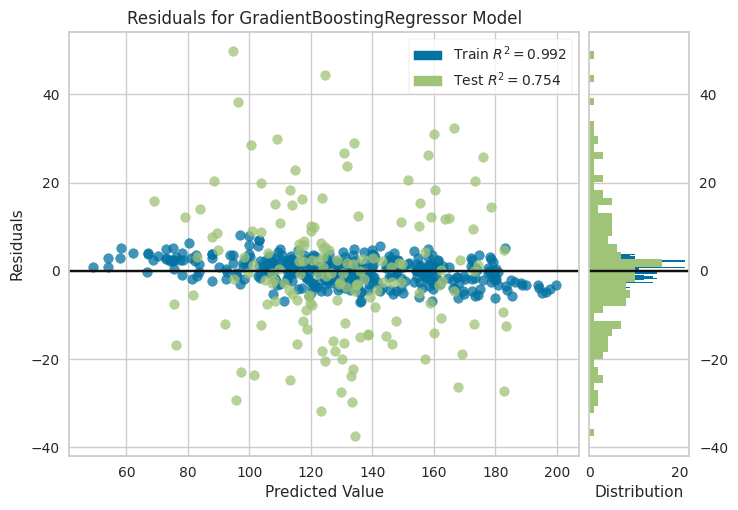

In [11]:
plot_model(gbr)

## Feature Importance

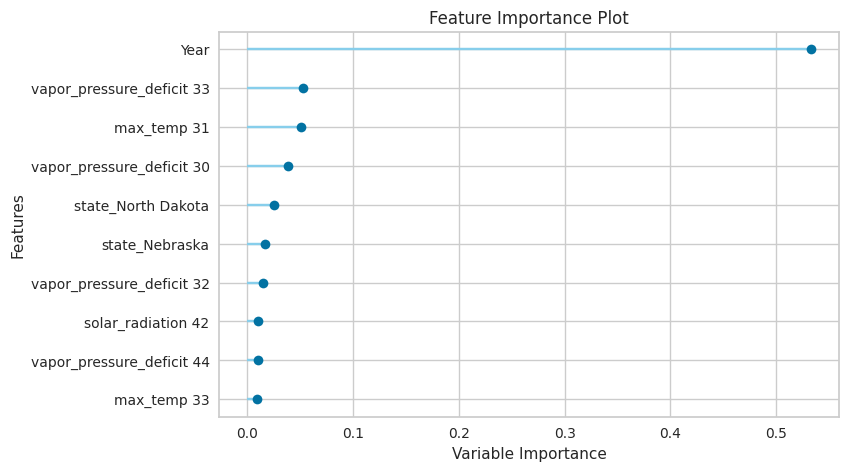

In [12]:
plot_model(gbr, plot='feature')

## Prediction Error Plot

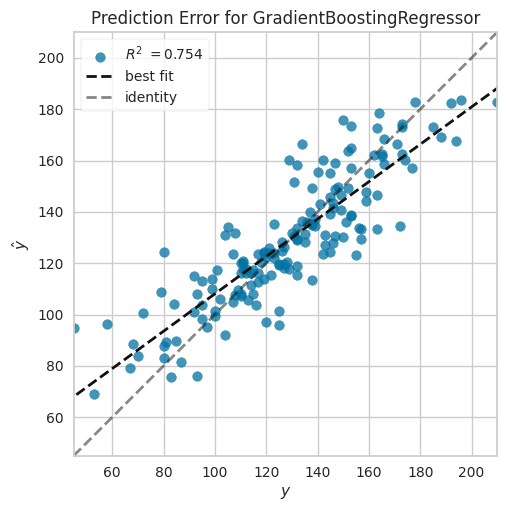

In [13]:
plot_model(gbr, plot = 'error')

## Model Evaluation

In [14]:
evaluate_model(gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [15]:
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,11.2837,225.3547,15.0118,0.7540,0.1358,0.0996


,Year,state,max_humidity 1,max_humidity 2,max_humidity 3,max_humidity 4,max_humidity 5,max_humidity 6,max_humidity 7,max_humidity 8,...,wind_speed 45,wind_speed 46,wind_speed 47,wind_speed 48,wind_speed 49,wind_speed 50,wind_speed 51,wind_speed 52,Corn_Yield,prediction_label
11,1980,South Dakota,84.388885,86.571426,83.528572,72.342857,83.371429,93.699997,86.528572,94.514282,...,3.657143,3.228571,3.457143,3.542857,3.385714,2.642857,3.814286,3.014286,53,68.920235
155,1991,Wisconsin,90.300003,89.571426,93.657143,84.785713,89.542854,97.385712,88.971428,96.971428,...,4.557143,3.385714,4.228571,5.171429,4.400000,4.800000,4.928571,2.785714,119,113.809690
496,2018,Iowa,98.487503,92.099998,85.085716,93.300003,81.785713,97.757141,91.800003,92.199997,...,4.857143,4.142857,5.014286,5.128572,3.628572,3.285714,4.114286,4.971428,196,183.470530
501,2018,Missouri,65.437500,76.800003,86.000000,81.042854,72.314285,89.842857,80.628571,89.657143,...,3.885714,3.442857,4.442857,5.771429,3.671429,4.171429,4.071429,5.214286,140,155.439848
405,2011,Iowa,87.957146,97.185715,97.699997,99.285713,98.385712,99.228569,89.442856,80.185715,...,5.242857,4.828571,5.014286,3.957143,3.614286,3.885714,4.285714,5.275000,172,134.490103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1995,Nebraska,100.000000,99.257141,100.000000,99.742859,95.085716,79.300003,95.585716,78.357140,...,4.685714,3.800000,4.071429,4.714286,4.814286,3.971429,3.914286,3.262500,111,117.713550
162,1992,Minnesota,88.919998,87.757141,75.785713,82.185715,88.142860,85.742859,86.157143,91.500000,...,4.385714,4.514286,2.928571,2.885714,4.200000,3.457143,3.100000,4.571429,114,111.341925
456,2015,Indiana,69.300003,87.585716,94.085716,88.657143,92.257141,92.214287,88.914284,93.442856,...,3.828571,5.385714,5.800000,4.928571,3.771429,4.400000,5.700000,5.414286,150,175.896937
408,2011,Michigan,95.599998,93.599998,99.714287,98.242859,99.471428,99.028572,94.271431,98.014282,...,6.785714,6.900000,5.414286,5.542857,6.728571,5.871428,5.071429,6.262500,153,138.603075


In [16]:
finalize_model(gbr)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'max_humidity 1',
                                             'max_humidity 2', 'max_humidity 3',
                                             'max_humidity 4', 'max_humidity 5',
                                             'max_humidity 6', 'max_humidity 7',
                                             'max_humidity 8', 'max_humidity 9',
                                             'max_humidity 10',
                                             'max_humidity 11',
                                             'max_humidity 12',
                                             'max_humidity 13',
                                             'max_humidity 14',
                                             'max_humidity 15',
                                             'ma...
                 TransformerWrapper(include=['state'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['state'],
                                    transformer=OneHotEncoder(cols=['state'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [17]:
save_model(gbr,'corn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'max_humidity 1',
                                              'max_humidity 2', 'max_humidity 3',
                                              'max_humidity 4', 'max_humidity 5',
                                              'max_humidity 6', 'max_humidity 7',
                                              'max_humidity 8', 'max_humidity 9',
                                              'max_humidity 10',
                                              'max_humidity 11',
                                              'max_humidity 12',
                                              'max_humidity 13',
                                              'max_humidity 14',
                                              'max_humidity 15',
                                              'ma...
                  TransformerWrapper(include=['state'],
                      

# 2. Soyabean

In [18]:
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

# Calculate the number of missing values in each column
missing_values_soybean = soybean_df.isnull().sum()

# Print the missing values
print(missing_values_soybean)

Year                                   0
state                                  0
max_humidity 1                         0
max_humidity 2                         0
max_humidity 3                         0
max_humidity 4                         0
max_humidity 5                         0
max_humidity 6                         0
max_humidity 7                         0
max_humidity 8                         0
max_humidity 9                         0
max_humidity 10                        0
max_humidity 11                        0
max_humidity 12                        0
max_humidity 13                        0
max_humidity 14                        0
max_humidity 15                        0
max_humidity 16                        0
max_humidity 17                        0
max_humidity 18                        0
max_humidity 19                        0
max_humidity 20                        0
max_humidity 21                        0
max_humidity 22                        0
max_humidity 23 

In [19]:
soybean_df.shape

(533, 480)

In [20]:
# Filter the columns containing '53' in their names
columns_to_drop = [col for col in soybean_df.columns if '53' in col]

# Drop the columns
soybean_df = soybean_df.drop(columns=columns_to_drop)

In [21]:
soybean_df.shape

(533, 471)

In [22]:
from pycaret.regression import *
reg = setup(data = soybean_df, target = 'Soybean_Yield', session_id=123)

,Description,Value
0,Session id,123
1,Target,Soybean_Yield
2,Target type,Regression
3,Original data shape,"(533, 471)"
4,Transformed data shape,"(533, 483)"
5,Transformed train set shape,"(373, 483)"
6,Transformed test set shape,"(160, 483)"
7,Numeric features,469
8,Categorical features,1
9,Preprocess,True


In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.1818,15.6118,3.9263,0.7937,0.1098,0.0901,4.7350
catboost,CatBoost Regressor,3.2996,17.1551,4.1006,0.7781,0.1153,0.0940,56.4790
et,Extra Trees Regressor,3.4085,19.0313,4.3263,0.7540,0.1214,0.0969,2.9870
lightgbm,Light Gradient Boosting Machine,3.4656,19.5851,4.3755,0.7434,0.1190,0.0969,1.3190
xgboost,Extreme Gradient Boosting,3.6428,21.3118,4.5905,0.7187,0.1275,0.1025,3.1140
br,Bayesian Ridge,3.7707,22.2172,4.6952,0.7036,0.1296,0.1063,0.3760
lasso,Lasso Regression,3.8702,23.2155,4.8010,0.6914,0.1339,0.1093,0.3270
llar,Lasso Least Angle Regression,3.8701,23.2146,4.8009,0.6914,0.1339,0.1093,0.3450
en,Elastic Net,3.8578,23.3832,4.8153,0.6890,0.1340,0.1089,0.3470
ada,AdaBoost Regressor,4.0937,25.6267,5.0271,0.6645,0.1352,0.1138,1.9450


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [24]:
gbr1 = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9332,12.4222,3.5245,0.8189,0.0930,0.0761
1,3.1151,16.7436,4.0919,0.8078,0.1220,0.0951
2,3.0396,13.1173,3.6218,0.8528,0.1040,0.0882
3,2.8749,12.6747,3.5602,0.7926,0.1018,0.0818
4,3.1709,13.8245,3.7181,0.8158,0.0945,0.0811
5,2.6205,10.7840,3.2839,0.8656,0.0916,0.0734
6,3.5982,22.0922,4.7002,0.7081,0.1341,0.1091
7,3.2511,16.1399,4.0175,0.7745,0.1292,0.1027
8,3.8691,20.8993,4.5716,0.7890,0.1184,0.1006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

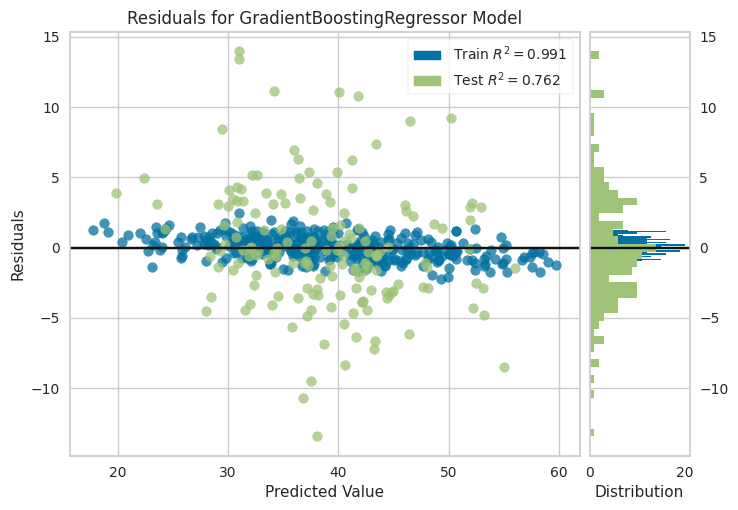

In [25]:
plot_model(gbr1)

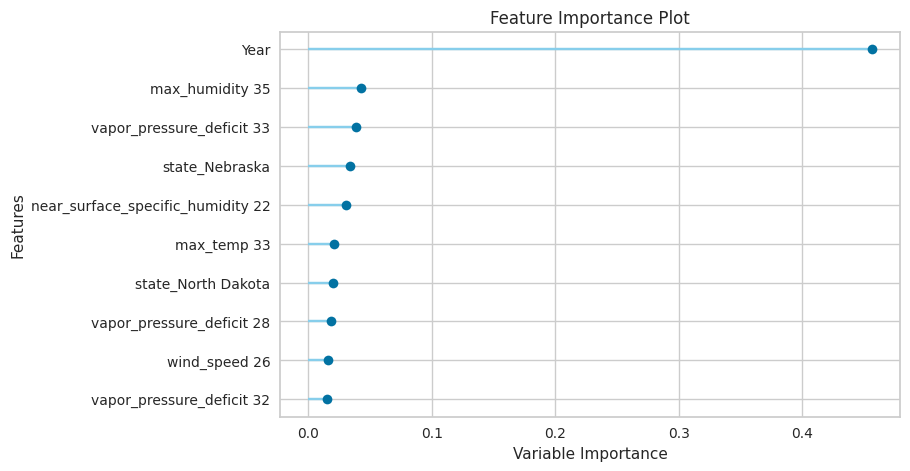

In [26]:
plot_model(gbr1, plot='feature')

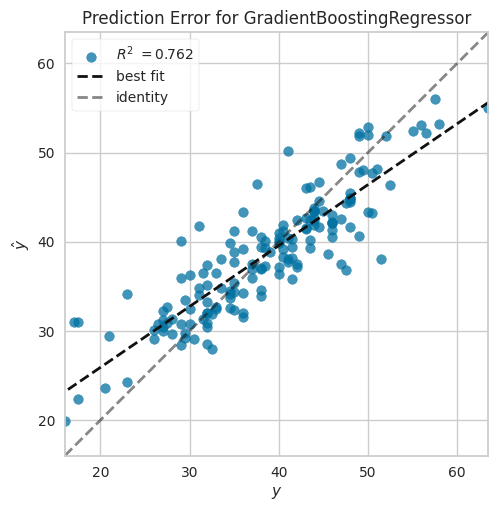

In [27]:
plot_model(gbr1, plot = 'error')

In [28]:
evaluate_model(gbr1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:
finalize_model(gbr1)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Year', 'max_humidity 1',
                                             'max_humidity 2', 'max_humidity 3',
                                             'max_humidity 4', 'max_humidity 5',
                                             'max_humidity 6', 'max_humidity 7',
                                             'max_humidity 8', 'max_humidity 9',
                                             'max_humidity 10',
                                             'max_humidity 11',
                                             'max_humidity 12',
                                             'max_humidity 13',
                                             'max_humidity 14',
                                             'max_humidity 15',
                                             'ma...
                 TransformerWrapper(include=['state'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('onehot_encoding',
                 TransformerWrapper(include=['state'],
                                    transformer=OneHotEncoder(cols=['state'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=123))])

In [30]:
save_model(gbr,'soy_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Year', 'max_humidity 1',
                                              'max_humidity 2', 'max_humidity 3',
                                              'max_humidity 4', 'max_humidity 5',
                                              'max_humidity 6', 'max_humidity 7',
                                              'max_humidity 8', 'max_humidity 9',
                                              'max_humidity 10',
                                              'max_humidity 11',
                                              'max_humidity 12',
                                              'max_humidity 13',
                                              'max_humidity 14',
                                              'max_humidity 15',
                                              'ma...
                  TransformerWrapper(include=['state'],
                      